# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

## SVMモデル作成

In [3]:
# データ読み込み
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 説明変数、目的変数
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

print(f'X_data\n{X.head()}')
print(f'y_data\n{y.head()}')

X_data
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
y_data
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [5]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
# 標準化
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [7]:
# PCA
pca = PCA(n_components=2)
pca.fit(X_train_scaled)

X_train_pc = pca.transform(X_train_scaled)
X_test_pc = pca.transform(X_test_scaled)

print(f'{X_train_scaled.shape[-1]} dimensions is reduced to {X_train_pc.shape[-1]} dimension by PCA')

4 dimensions is reduced to 2 dimension by PCA


In [8]:
# 学習
# model = SVC(kernel='linear')
model = SVC(kernel='poly', C=10)
model.fit(X_train_pc, y_train)

SVC(C=10, kernel='poly')

In [9]:
# 予測
y_pred= model.predict(X_test_pc)

In [10]:
# 正解率
accuracy_score(y_test, y_pred)

0.9333333333333333

In [11]:
# サポートベクトル
model.support_vectors_

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [-0.33739989, -2.59040494],
       [ 0.68991796,  0.71639709],
       [ 1.01841242,  0.75406273],
       [ 0.00304253, -0.16979486],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.76807504,  0.17465618],
       [ 0.58546256, -0.11934379],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.67115053,  0.36047773],
       [ 0.83577732, -1.44733591],
       [ 1.36078095,  0.15396725],
       [ 1.0415574 , -1.76613312],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 , -0.36356179],
       [ 0.21142607, -1.52270906],
       [ 1.01399725, -0.74821922],
       [ 0.86207563, -0.06985412],
       [ 1.28474342,  0.5928925 ],
       [ 1.326855  ,  0.92380604],
       [ 1.08677516, -1.21143932],
       [ 0.82552169, -0.03239705],
       [ 1.52725209,

## 決定境界とサポートベクトルを可視化

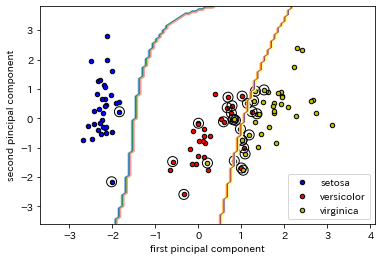

In [12]:
# 決定境界描画
DecisionBoundaryDisplay.from_estimator(model
                                      ,X_train_pc
                                      ,plot_method='contour'
                                      ,cmap=plt.cm.Paired
                                      ,xlabel='first pincipal component'
                                      ,ylabel='second pincipal component')

# PCA後学習データプロット
for class_, color in zip(model.classes_, ['b', 'r', 'y']):
    idx = np.where(y_train == class_)
    plt.scatter(X_train_pc[idx, 0]
               ,X_train_pc[idx, 1]
               ,c=color
               ,label=class_
               ,edgecolors='black'
               ,s=20)

# サポートベクトルプロット
plt.scatter(model.support_vectors_[:,0]
           ,model.support_vectors_[:,1]
           ,s=100
           ,facecolor='none'
           ,linewidths=1
           ,edgecolors='black')

plt.legend()